All imports 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_data = pd.read_csv("diabetic_data.csv")
diabetes_data = diabetes_data.copy()


Get all the column names from the dataframe

In [3]:
diabetes_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Seperate the target viariable from the dataset.


In [4]:
pd.isna(diabetes_data).sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
diabetes_data["A1Cresult"].unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

Pandas is treating none as nan which i dont want to. The diabetic dataset does not contain any missing values but since none means "not measure" according to the Data description. 
Therefore, I am converting those nan values into "not measured" for every row with the code below

In [6]:
diabetes_data["A1Cresult"] =  diabetes_data['A1Cresult'].replace(np.nan, "not measured")

In [7]:
diabetes_data["A1Cresult"].isna().sum()

0

Similary, max_glu_serum does not have any missing values. Panda is treating "none" with "nan".
I am replacing the nan with "not measured",

In [8]:
diabetes_data["max_glu_serum"] =  diabetes_data['max_glu_serum'].replace(np.nan, "not measured")

In [9]:
diabetes_data["max_glu_serum"].isna().sum()

0

Now verifying Unique values for max_glu_serum nad A1Cresult

In [10]:
diabetes_data["max_glu_serum"].unique()

array(['not measured', '>300', 'Norm', '>200'], dtype=object)

In [11]:
diabetes_data["A1Cresult"].unique()

array(['not measured', '>7', '>8', 'Norm'], dtype=object)

In [12]:
diabetes_data["weight"].unique()


array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [13]:
# here we can see ? symbol. This is a missing value so I will replace it with np.na and count how many are missing in total
diabetes_data["weight"] = diabetes_data["weight"].replace("?", np.nan)


In [14]:
diabetes_data.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [15]:
# I will drop the weight column as 98569 values are missing which is 91% of the data.
diabetes_data.drop(columns=["weight"], inplace=True)

In [16]:
diabetes_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [17]:
# similarly I am going to drop payer code, medical_speicality, encounter ID,
# patient number, payer code, medical speciality

diabetes_data.drop(columns=["encounter_id", "patient_nbr", "medical_specialty", "payer_code"], inplace=True)
diabetes_data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Now is the time to do some data exploration. I will analyze the data one-by-one for all the features starting with race.

In [18]:
diabetes_data["race"].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [19]:
row_count = diabetes_data["race"].str.contains("?", na=False, regex=False).sum()
print(row_count)

2273


In [20]:
# Removing all rows that dont contains the "?" symbol.
diabetes_data = diabetes_data[~diabetes_data["race"].str.contains("\?", na=False)]
diabetes_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [21]:
diabetes_data["gender"].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [22]:
row_count = diabetes_data["gender"].str.contains("Unknown/Invalid").sum()
print(row_count)

1


In [23]:
#removing rows for columns "gender" where value is "Unknown/Invalid"
diabetes_data = diabetes_data[~diabetes_data["gender"].str.contains("Unknown/Invalid", na=False)]
diabetes_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [24]:
diabetes_data["age"].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [25]:
diabetes_data["admission_type_id"].unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

In [26]:
target_var = diabetes_data["readmitted"]
target_var
pd.unique(target_var)

array(['NO', '>30', '<30'], dtype=object)

In [27]:
diabetes_data["discharge_disposition_id"].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [28]:
diabetes_data["admission_source_id"].unique()

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [29]:
diabetes_data["time_in_hospital"].unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10, 11,  6,  8, 14])

In [30]:
diabetes_data["num_lab_procedures"].unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  19,  64,  25,  53,  52,  87,
        27,  37,  46,  28,  36,  48,  72,  10,   2,  65,  67,  40,  58,
        57,  32,  83,  34,  39,  69,  38,  56,  22,  96,  78,  61,  88,
        66,  43,  50,   1,  18,  82,  54,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,  95,  97,  84,  14,  74, 105,  86,  98,  20,
         5,   6,  94,   8, 102, 100,   7,  89,  91,  92,   4, 101,  99,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118])

In [31]:
diabetes_data["num_procedures"].unique()

array([0, 5, 1, 6, 2, 3, 4])

In [32]:
diabetes_data["num_medications"].unique()

array([ 1, 18, 13, 16,  8, 21, 12, 28, 17, 11, 15, 31,  2, 23, 19,  7, 20,
       14, 10, 22,  9, 27, 25,  4, 32,  6, 30, 26, 24, 33,  5, 39,  3, 29,
       61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49,
       62, 55, 47, 44, 48, 57, 53, 59, 56, 63, 58, 70, 67, 64, 60, 69, 65,
       68, 66, 81, 79, 75, 72, 74])

In [33]:
diabetes_data["number_outpatient"].unique()

array([ 0,  2,  1,  5,  7,  9,  3,  8,  4, 12, 11,  6, 20, 15, 10, 13, 14,
       16, 21, 35, 17, 29, 36, 18, 19, 27, 22, 24, 42, 39, 34, 26, 33, 25,
       23, 28, 37, 38, 40])

In [34]:
diabetes_data["number_emergency"].unique()

array([ 0,  1,  2,  4,  3,  9,  5,  7,  6,  8, 22, 25, 10, 13, 42, 16, 11,
       28, 15, 14, 18, 12, 21, 20, 19, 46, 76, 37, 64, 63, 54, 24, 29])

In [35]:
diabetes_data["number_inpatient"].unique()

array([ 0,  1,  2,  3,  6,  5,  4,  7,  8,  9, 15, 10, 11, 14, 12, 13, 17,
       16, 21, 18, 19])

In [36]:
diabetes_data["diag_1"].unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', 'V57', '189',
       '786', '427', '996', '277', '584', '462', '473', '411', '174',
       '486', '998', '511', '432', '626', '295', '196', '250.6', '182',
       '845', '423', '808', '250.4', '722', '403', '250.11', '784', '707',
       '440', '151', '715', '997', '198', '564', '38', '590', '578',
       '250.32', '433', '569', '185', '536', '255', '250.13', '599',
       '558', '574', '491', '560', '244', '250.03', '577', '730', '188',
       '824', '250.8', '332', '562', '291', '296', '510', '401', '263',
       '438', '70', '250.02', '493', '642', '571', '738', '593', '618',
       '250.42', '807', '456', '446', '572', '575', '250.41', '820',
       '515', '780', '250.22', '995', '235', '250.82', '721', '787',
       '556', '162', '724', '282', '514', 'V55', '281', '250.33', '530',
       '466', '435', '250.12', 'V53', '789', '566', '822', '191', '557',
 

In [37]:
diabetes_data["diag_2"].unique()

array(['?', '250.01', '250', '250.43', '157', '411', '492', '427', '198',
       '403', '288', '998', '507', '174', '425', '401', '715', '496',
       '428', '585', '250.02', '410', '999', '996', '135', '244', '41',
       '571', '276', '997', '599', '424', '491', '553', '707', '286',
       '440', '493', '242', '70', 'V45', '250.03', '357', '511', '196',
       '396', '197', '414', '250.52', '577', '535', '413', '53', '780',
       '518', '566', '250.6', '867', '285', '486', 'V15', '8', '788',
       '340', '574', '581', '228', '530', '250.82', '786', '294', '567',
       '785', '512', '305', '250.51', '280', '648', '560', '444', '38',
       'V10', '578', '277', '781', '250.42', '278', '426', '584', '462',
       '402', '153', '272', '733', '34', '881', '203', '250.41', '250.13',
       '729', '293', '245', '250.12', '558', '787', '342', '573', '626',
       '303', '250.53', '458', '710', '415', 'V42', '284', '569', '759',
       '682', '112', '292', '435', '290', '250.93', '642', '5

In [38]:
diabetes_data["diag_3"].unique()

array(['?', '255', 'V27', '403', '250', 'V45', '38', '486', '996', '197',
       '250.6', '427', '627', '414', '416', '582', 'V43', '250.01', '263',
       '250.42', '276', '482', '401', '250.41', '585', '781', '278',
       '998', '428', '568', '682', '250.02', '305', '707', '496', '599',
       '424', '518', '553', '794', '411', 'V42', '531', '511', '490',
       '562', '250.8', '250.7', '250.52', '784', '491', '581', '420',
       '724', '730', '789', '131', '250.82', '999', '41', '493', '250.03',
       '753', '786', '529', 'E888', '425', '595', '303', '560', '711',
       '8', '492', '332', '296', '438', '362', '250.4', '654', '244',
       'V70', '737', '625', '681', '250.51', '404', 'V10', '810', '280',
       '440', '785', '569', '272', '997', '250.43', '918', '584', '54',
       '788', '426', '722', '250.92', '196', '461', '535', '787', '891',
       '284', '458', '648', '780', '182', '285', '593', '413', '664',
       '564', '201', '356', 'V15', '292', '782', '715', '473', '4

In [39]:
diabetes_data["number_diagnoses"].unique()

array([ 1,  9,  6,  7,  5,  8,  3,  4,  2, 16, 12, 13, 15, 10, 11, 14])

In [40]:
diabetes_data["max_glu_serum"].unique()

array(['not measured', '>300', 'Norm', '>200'], dtype=object)

In [41]:
diabetes_data["A1Cresult"].unique()

array(['not measured', '>7', '>8', 'Norm'], dtype=object)

In [42]:
diabetes_data["metformin"].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [43]:
diabetes_data["change"].unique()

array(['No', 'Ch'], dtype=object)

In [44]:
diabetes_data["diabetesMed"].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
diabetes_data["readmitted"].unique()

array(['NO', '>30', '<30'], dtype=object)

No that we have removed all null/redundant values, we will start doing some real exploratory data analysis

In [46]:
diabetes_data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

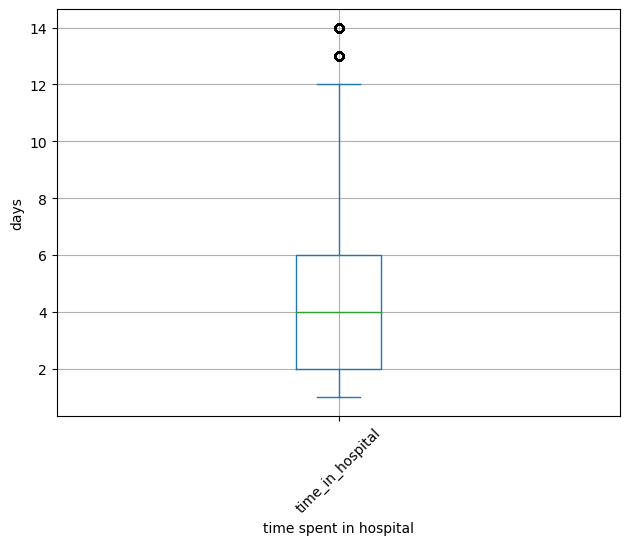

In [47]:
box_plot_time_hospital = diabetes_data["time_in_hospital"].plot(kind="box", grid=True)
box_plot_time_hospital.set_xlabel("time spent in hospital")
box_plot_time_hospital.set_ylabel("days")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [48]:
diabetes_data["time_in_hospital"].value_counts()

time_in_hospital
3     17342
2     16841
1     13877
4     13605
5      9763
6      7366
7      5720
8      4297
9      2940
10     2291
11     1816
12     1427
13     1189
14     1018
Name: count, dtype: int64

In [49]:
diabetes_data[["time_in_hospital", "num_lab_procedures", "num_medications", "number_emergency", "number_diagnoses",
             "number_outpatient", "number_inpatient"]].describe()

,time_in_hospital,num_lab_procedures,num_medications,number_emergency,number_diagnoses,number_outpatient,number_inpatient
count,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000
mean,4.398454,43.072971,16.026545,0.201343,7.439251,0.373357,0.643107
std,2.986972,19.695587,8.119809,0.939981,1.926043,1.276805,1.271370
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,31.000000,10.000000,0.000000,6.000000,0.000000,0.000000
50%,4.000000,44.000000,15.000000,0.000000,8.000000,0.000000,0.000000
75%,6.000000,57.000000,20.000000,0.000000,9.000000,0.000000,1.000000
max,14.000000,132.000000,81.000000,76.000000,16.000000,42.000000,21.000000


Box plot on num_lab_procedures


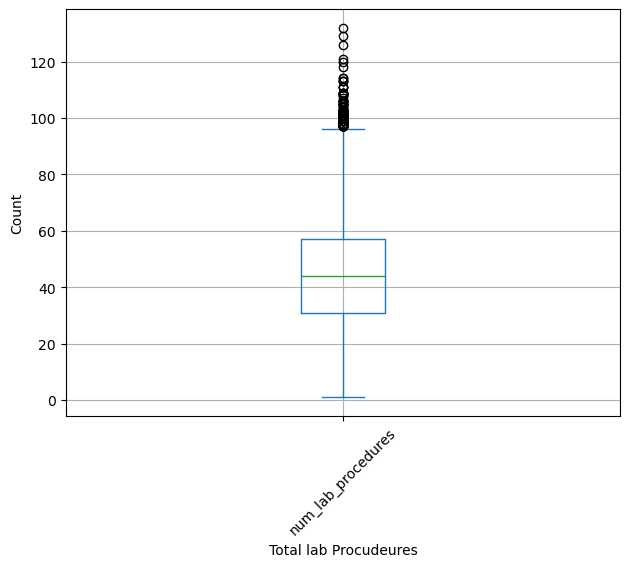

In [50]:
box_plot_time_hospital = diabetes_data["num_lab_procedures"].plot(kind="box", grid=True)
box_plot_time_hospital.set_xlabel("Total lab Procudeures")
box_plot_time_hospital.set_ylabel("Count")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [51]:
diabetes_data[diabetes_data["num_lab_procedures"]>50][[ "time_in_hospital"]].value_counts().sort_index()
pd.set_option('display.max_rows', None)
diabetes_data[["num_lab_procedures", "time_in_hospital"]].groupby(["time_in_hospital", "num_lab_procedures"]).value_counts()

time_in_hospital  num_lab_procedures
1                 1                     700
                  2                     263
                  3                     227
                  4                     140
                  5                      81
                  6                     100
                  7                      73
                  8                     109
                  9                     213
                  10                    252
                  11                    188
                  12                    153
                  13                     93
                  14                     76
                  15                     95
                  16                    113
                  17                    161
                  18                    162
                  19                    291
                  20                    169
                  21                    154
                  22                   

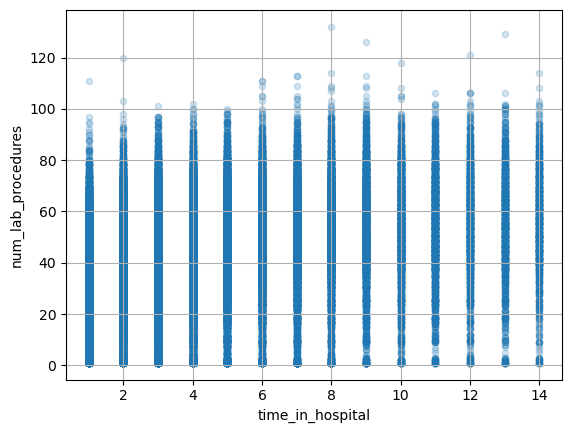

In [52]:
scatter_lab_stay = diabetes_data.plot(kind="scatter", x = "time_in_hospital",y = "num_lab_procedures", grid=True, alpha=0.2)
plt.show()

Looking at the scratter plot between time in hospital and the total lab procedures it appears that lab procedure tend to increase
as time in hospital increases. It also shows that for a particular time of stay, there are variation in the 
number of lab procedures as well. I have decided to keep the data as it is as removing any outliers may discard
valuable insights.

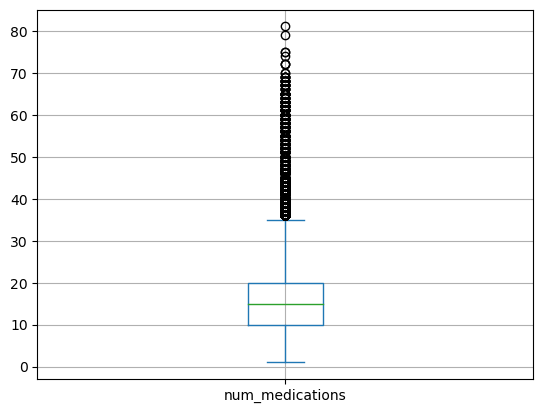

In [53]:
medication_total = diabetes_data['num_medications']
medication_total.plot(kind="box", grid=True)
plt.show()

In [54]:
medication_total.value_counts().sort_index()

num_medications
1      251
2      458
3      877
4     1376
5     1964
6     2632
7     3401
8     4266
9     4802
10    5244
11    5664
12    5866
13    5929
14    5579
15    5662
16    5305
17    4819
18    4421
19    3965
20    3608
21    3163
22    2812
23    2384
24    2074
25    1857
26    1576
27    1414
28    1212
29     971
30     832
31     697
32     608
33     495
34     443
35     383
36     281
37     285
38     221
39     205
40     174
41     138
42     124
43     126
44      98
45      80
46      89
47      72
48      57
49      61
50      52
51      43
52      53
53      37
54      33
55      31
56      37
57      26
58      24
59      20
60      20
61      14
62      15
63      13
64       7
65      12
66       5
67       7
68       7
69       5
70       2
72       3
74       1
75       2
79       1
81       1
Name: count, dtype: int64

I have decided to keep the outliers in the total medication because if I remove  cenrtain people who take more 
number of medicine could indicate multiple conditions of the patient. Removing them might influence the readmission 
prediction. I have decided to keep them.


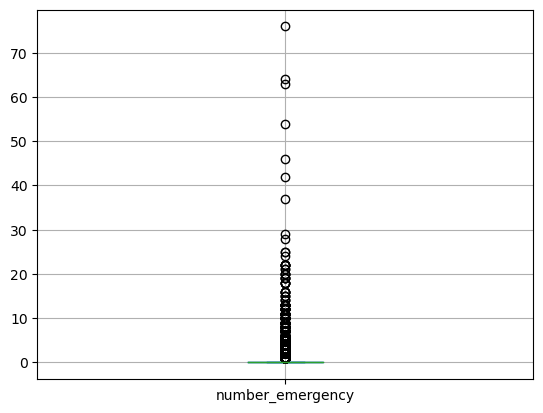

In [55]:
total_emergency_data = diabetes_data['number_emergency']
total_emergency_data.plot(kind="box", grid=True)
plt.show()

In [56]:
total_emergency_data.value_counts().sort_index()

number_emergency
0     88189
1      7615
2      2027
3       722
4       374
5       192
6        94
7        73
8        50
9        33
10       34
11       23
12       10
13       12
14        3
15        3
16        5
18        5
19        4
20        4
21        2
22        6
24        1
25        2
28        1
29        1
37        1
42        1
46        1
54        1
63        1
64        1
76        1
Name: count, dtype: int64

Again this is a valid data and I am not removing any outliers. max emergency total is 76 and min is 0. which is 
completely valid. Removing them might remove those people who are in high chance of going to be readmitted.

I want to know the relation between total emergency visits and number of diagnosis.


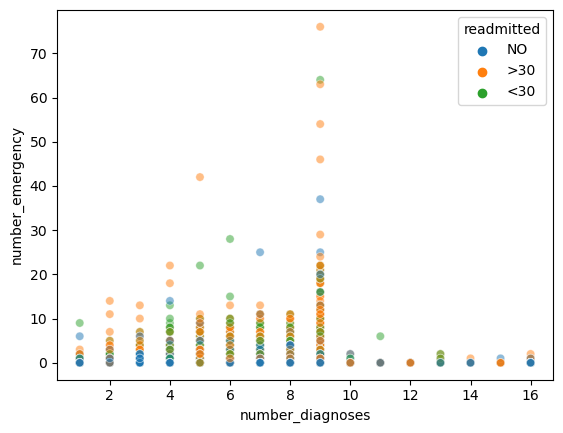

In [57]:
sns.scatterplot(data=diabetes_data, 
                x="number_diagnoses", 
                y="number_emergency", 
                hue="readmitted",  
                alpha=0.5)
plt.show()

Looking at the scatter plot, number of emergency visit increases as the total diagnosis increase up to 9.
Then starting from 10, it hits a plateau.
This could be of a number of factors like the patient being transferred into another department or
data collection limits.
Another key insight is that majority of the patients with diagnosis more than 9 are readmitted to the hospital.
Readmission also increases as the number of emergency visit increases.( patient who visit the emergency more often might have poorly controlled condition or acute conditions.



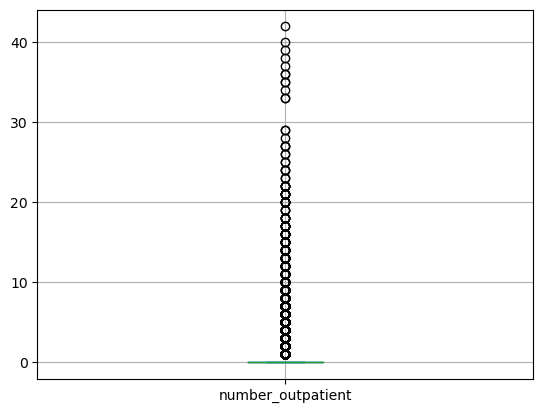

In [58]:
total_outpatient_visits = diabetes_data['number_outpatient'].plot(kind="box", grid=True)
plt.show()

The box plot suggest that majority of the  patient have 0 outpatient visit. Rest of the points in the graph
suggest that they are outliers but removing these might interfere without prediction of the true readmissionr rate
as visiting outpatient as much as 40 doest not seem to be abnormal for patients with complication. So I have 
decided to keep the data as is.

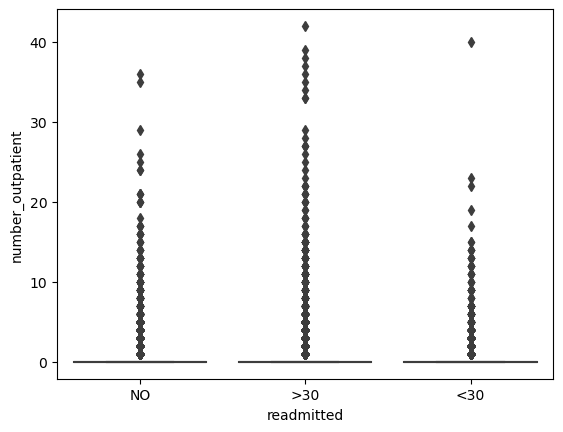

In [59]:
sns.boxplot(x="readmitted", y="number_outpatient", data=diabetes_data)
plt.show()

Inpatient Total Visits

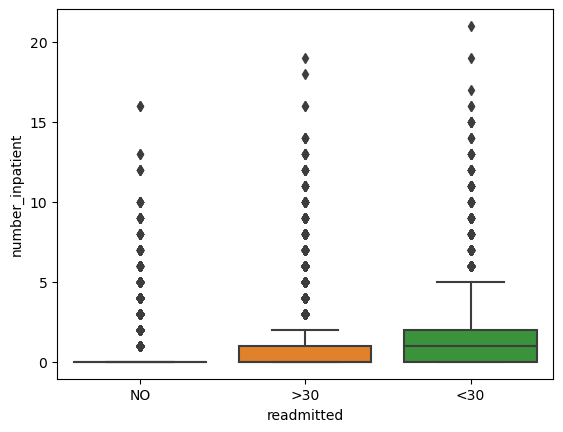

In [60]:
sns.boxplot(x="readmitted", y="number_inpatient", data=diabetes_data)
plt.show()

The plot above suggests that higher inpatient visit counts are associated with a higher chance of being readmitted within 30 days.

# Now lets take a look at our categorical features


readmitted            <30       >30        NO
race                                         
AfricanAmerican  0.113305  0.346588  0.540107
Asian            0.104000  0.254400  0.641600
Caucasian        0.113409  0.357979  0.528612
Hispanic         0.104733  0.318731  0.576536
Other            0.095752  0.296696  0.607552


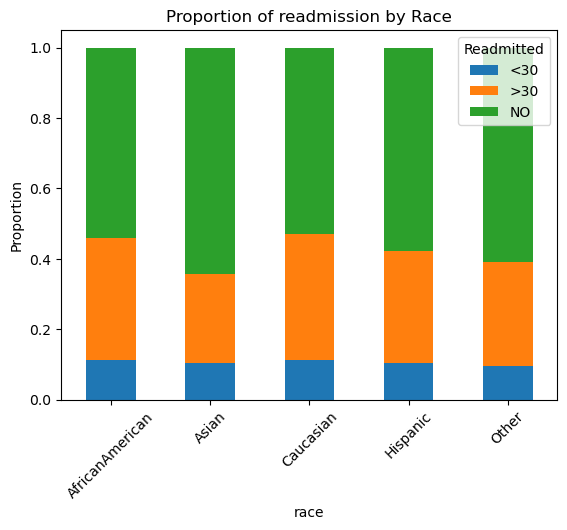

In [113]:
def stacked_bar(feature, title):
    
    crosstab_table = pd.crosstab(diabetes_data[feature], diabetes_data['readmitted'], normalize='index')
    print(crosstab_table)
    crosstab_table.plot(kind='bar', stacked=True)
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.legend(title='Readmitted')
    plt.show()
stacked_bar("race", "Proportion of readmission by Race")

Looking at the stacked bar chart the readmittance rate is similar in all races.
But, I want to make sure by using the chisquare test.

In [62]:

from scipy.stats import chi2_contingency

def chisquare_test_Cramers_value(feature, data):

    contingency_table = pd.crosstab(data[feature], data['readmitted'])

    chi2, p, degree_of_freedom, expected = chi2_contingency(contingency_table)

    print(f"Chi-square Statistic for {feature} is {chi2}" )
    print(f"Degrees of Freedom for {feature} is {degree_of_freedom}" )
    print(f"p-value for {feature} is {p}")
    n = contingency_table.to_numpy().sum()
    minumum_dimension = min(contingency_table.shape) -1
    cramers_v = np.sqrt(chi2 / (n * minumum_dimension))
    print(f"The Cramers Value for {feature} is {cramers_v}")

chisquare_test_Cramers_value("race", diabetes_data)

Chi-square Statistic for race is 94.14242894464596
Degrees of Freedom for race is 8
p-value for race is 6.688158971349481e-17
The Cramers Value for race is 0.02175122000780914


The p value appears to be extremely small which suggests that even though the stacked bar chart does not show
significant relation between race and readmittance within 30 days, The chi square test says it other wise.
But the Cramer's value of 0.02175 is an extremely small value that suggest that race is not a strong predrictor and does not have practical significance in predicting the readmmitance of a diabetic patient.




here are the values of discharge_disposition_id one of the categorical features.
description
1 Discharged to home
2 Discharged/transferred to another short term hospital
3 Discharged/transferred to SNF
4 Discharged/transferred to ICF
5 Discharged/transferred to another type of inpatient care institution
6 Discharged/transferred to home with home health service
7 Left AMA
8 Discharged/transferred to home under care of Home IV provider
9 Admitted as an inpatient to this hospital
10 Neonate discharged to another hospital for neonatal aftercare
11 Expired
12 Still patient or expected to return for outpatient services
13 Hospice / home
14Hospice / medical facility
15 Discharged/transferred within this institution to Medicare approved swing bed
16 Discharged/transferred/referred another institution for outpatient services
17 Discharged/transferred/referred to this institution for outpatient services
18 NULL
19 Expired at home. Medicaid only, hospice.
20 Expired in a medical facility. Medicaid only, hospice.
21 Expired, place unknown. Medicaid only, hospice.
22 Discharged/transferred to another rehab fac including rehab units of a hospital .
23 Discharged/transferred to a long term care hospital.
24 Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
25 Not Mapped
26 Unknown/Invalid
27 Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
28 Discharged/transferred to a federal health care facility.
29 Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
30 Discharged/transferred to a Critical Access Hospital (CAH).

I will convert "Not Mapped", "Unknown/Invalid", and "NULL" values into a different value  called 31

In [63]:
diabetes_data["discharge_disposition_id"] = diabetes_data["discharge_disposition_id"].replace({18:31,25:31, 26:31 })


/var/folders/p4/3cqzf41n6qd9wztj0kpx71_m0000gn/T/ipykernel_51922/236339597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data["discharge_disposition_id"] = diabetes_data["discharge_disposition_id"].replace({18:31,25:31, 26:31 })


In [64]:
diabetes_data["discharge_disposition_id"].unique()

array([31,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14,  8, 13, 12, 16, 17, 22,
       23,  9, 20, 15, 24, 28, 19, 27])

Now lets run the chi square and Cramer's V 


In [65]:
chisquare_test_Cramers_value("discharge_disposition_id", diabetes_data)

Chi-square Statistic for discharge_disposition_id is 3493.664237787813
Degrees of Freedom for discharge_disposition_id is 48
p-value for discharge_disposition_id is 0.0
The Cramers Value for discharge_disposition_id is 0.13250476729835634


discharge_disposition_id has a extremely low p value and a Cramers V of 0.1325 which is higher compared to the 
cramers V obtained from race.
Thus it is a stronger predictor!
This may indicate that the way that patients are diabetic patients are discharge carries more clues in regards to readmission!

Now lets check for gender

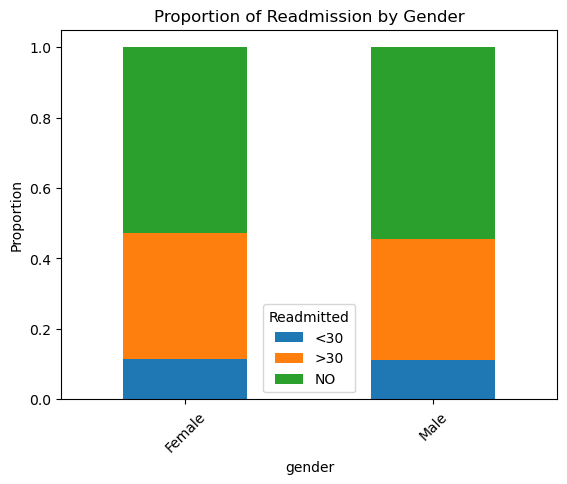

In [66]:


    
stacked_bar("gender", "Proportion of Readmission by Gender")

Again, looking at the graph, there are similar readmittance proportion between gender and readmittance. 
I want to check using the chi-square method



In [67]:
chisquare_test_Cramers_value("gender", diabetes_data)

Chi-square Statistic for gender is 35.233435270253
Degrees of Freedom for gender is 2
p-value for gender is 2.234378489930308e-08
The Cramers Value for gender is 0.018818431128049578


Again the p-value is significantly low that rejects the null hypothesis of no assosiation between gender and readmisssion.
But the Cramers value is not significant and tells that in practicality, gender might be less significant in
predicting readmittance. 

In [68]:
chisquare_test_Cramers_value("age", diabetes_data)

Chi-square Statistic for age is 300.17730566423313
Degrees of Freedom for age is 18
p-value for age is 4.427999247625145e-53
The Cramers Value for age is 0.03884005615506728


With 18 degree of freedom and chi-square of 300 with a very small p value, age is a strong candidate for
the prediction of readdmitance.

Since age is in range, I am transforming the range into a single value using the midpoint.


In [69]:
diabetes_data['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [70]:
diabetes_data['age'] = diabetes_data["age"].replace({'[0-10)': 5,'[10-20)': 15, '[20-30)':25,
                    '[30-40)':35, '[40-50)':45, '[50-60)':55,'[60-70)':65, '[70-80)':75, '[80-90)':85,
                                                    '[90-100)':95} )

/var/folders/p4/3cqzf41n6qd9wztj0kpx71_m0000gn/T/ipykernel_51922/2088729795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data['age'] = diabetes_data["age"].replace({'[0-10)': 5,'[10-20)': 15, '[20-30)':25,


In [71]:
diabetes_data["age"].unique()

array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95])

In [72]:
chisquare_test_Cramers_value("age", diabetes_data)

Chi-square Statistic for age is 300.17730566423313
Degrees of Freedom for age is 18
p-value for age is 4.427999247625145e-53
The Cramers Value for age is 0.03884005615506728


In [73]:
diabetes_data["admission_type_id"].unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

In [74]:
diabetes_data['admission_type_id'].value_counts()


admission_type_id
1    52900
3    18507
2    17786
6     5225
5     4727
8      317
7       20
4       10
Name: count, dtype: int64

here 
1: Emergency
2: Urgent
3: Elective
4: Newborn
5: Not Avaiable
6: NULL
7: Trauma Center
8: Not Mapped
    

In [75]:
chisquare_test_Cramers_value("admission_type_id", diabetes_data)

Chi-square Statistic for admission_type_id is 400.3339569741952
Degrees of Freedom for admission_type_id is 14
p-value for admission_type_id is 1.0783420988685313e-76
The Cramers Value for admission_type_id is 0.04485409888762724


Now, I want to categorize null, not available, and not mapped as unknown. And redo the chi square test

In [76]:

diabetes_data['admission_type_id'] = diabetes_data["admission_type_id"].replace({6:5, 7:5, 8:5})


/var/folders/p4/3cqzf41n6qd9wztj0kpx71_m0000gn/T/ipykernel_51922/3738428534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data['admission_type_id'] = diabetes_data["admission_type_id"].replace({6:5, 7:5, 8:5})


In [77]:
diabetes_data["admission_type_id"].unique()

array([5, 1, 2, 3, 4])

In [78]:
chisquare_test_Cramers_value("admission_type_id",diabetes_data)

Chi-square Statistic for admission_type_id is 304.01296985673093
Degrees of Freedom for admission_type_id is 8
p-value for admission_type_id is 5.760451672621216e-61
The Cramers Value for admission_type_id is 0.039087417494792734


Admission Type also has a good indicative p value but lacks a significant Cramer's V indiciating that in practical, this feature might not be significant for predicting readmittance based on our data.

# Now lets check in admission source id
The values of admission source id are
1 Physician Referral
2 Clinic Referral
3 HMO Referral
4 Transfer from a hospital
 5 Transfer from a Skilled Nursing Facility (SNF)
 6 Transfer from another health care facility
 7 Emergency Room
 8 Court/Law Enforcement
 9 Not Available
 10 Transfer from critial access hospital
11 Normal Delivery
 12Premature Delivery
 13 Sick Baby
 14 Extramural Birth
15 Not Available
16 NULL
 17 Transfer From Another Home Health Agency
18 Readmission to Same Home Health Agency
 19 Not Mapped
20 Unknown/Invalid
 21 Transfer from hospital inpt/same fac reslt in a sep claim
 22 Born inside this hospital
 23 Born outside this hospital
 24 Transfer from Ambulatory Surgery Center
25 Transfer from Hospice

For the values Not Available, for 9, 15, null for 17, not mapped for 20, Unknown/Invalid for 21, I will create a value called 27.

In [79]:
diabetes_data["admission_source_id"].unique()

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [80]:
diabetes_data['admission_source_id'] = diabetes_data["admission_source_id"].replace({9:27, 15:27, 17:27,20:27})

/var/folders/p4/3cqzf41n6qd9wztj0kpx71_m0000gn/T/ipykernel_51922/3183280628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data['admission_source_id'] = diabetes_data["admission_source_id"].replace({9:27, 15:27, 17:27,20:27})


In [81]:
diabetes_data["admission_source_id"].unique()

array([ 1,  7,  2,  4,  5,  6, 27,  3,  8, 14, 10, 22, 11, 25, 13])

In [82]:
chisquare_test_Cramers_value("admission_source_id", diabetes_data)

Chi-square Statistic for admission_source_id is 977.1249041264646
Degrees of Freedom for admission_source_id is 28
p-value for admission_source_id is 9.848985257250906e-188
The Cramers Value for admission_source_id is 0.07007546087851575


The extreme low p value suggest that admission_source_id is statistically significant while the low Cramer's V
Clues that even though the feature is statistically significant, the associated strength  is weaker. Suggesting that
admission_source_id might not be a strong preditor!

# still need to do one hot encoding for admission types. Will do it later in the pipeline 

In [83]:
diabetes_data["diag_1"].value_counts()


diag_1
428       6739
414       6406
786       3938
410       3518
486       3425
427       2712
491       2228
715       2099
682       1996
780       1991
434       1990
996       1943
276       1836
38        1648
250.8     1642
599       1560
584       1500
V57       1181
250.6     1152
518       1092
820       1059
493       1041
577       1032
435        994
562        972
574        952
560        860
296        859
250.7      854
250.13     839
440        823
433        776
998        762
722        747
250.02     658
578        645
250.11     608
507        595
789        553
453        536
530        522
403        503
8          500
535        446
402        446
415        438
295        438
724        422
458        421
162        420
997        418
250.82     407
250.12     406
285        362
733        353
278        351
592        343
401        341
558        333
482        333
590        331
197        314
280        312
824        308
153        307
250.1      305
569

In [84]:
# i can see that there are 19 values with a ? 
diabetes_data = diabetes_data[diabetes_data["diag_1"] != "?"]
diabetes_data = diabetes_data[diabetes_data["diag_3"] != "?"]


In [85]:
# I need to decode the ICD9 Codes so that I can classify these codes into categories. 
From https://www.aapc.com/codes/icd9-codes-range/?srsltid=AfmBOorbrUHgLQMM9EA88qNcPQG3J1JHrtk2u5u6sVtUZ1sgV0iLdOMm
    I was able to find the list of ranges and categories for the 3 digit codes.
This is the list
001-139INFECTIOUS AND PARASITIC DISEASES (001-139)
140-239NEOPLASMS (140-239)
240-279ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS (240-279)
280-289DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS (280-289)
290-319MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS (290-319)
320-389DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS (320-389)
390-459DISEASES OF THE CIRCULATORY SYSTEM (390-459)
460-519DISEASES OF THE RESPIRATORY SYSTEM (460-519)
520-579DISEASES OF THE DIGESTIVE SYSTEM (520-579)
580-629DISEASES OF THE GENITOURINARY SYSTEM (580-629)
630-679COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM (630-679)
680-709DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE (680-709)
710-739DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE (710-739)
740-759CONGENITAL ANOMALIES (740-759)
760-779CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD (760-779)
780-799SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS (780-799)
800-999INJURY AND POISONING (800-999)
E000-E999SUPPLEMENTARYCLASSIFICATION OF EXTERNAL CAUSES OF INJURY AND POISONING (E000-E999)
V01-V91SUPPLEMENTARY CLASSIFICATION OF FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES (V01-V91)

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (4254263195.py, line 5)

In [86]:
# I will create a function to decode this codes and apply it in the diabetes dataframe.
def decode_icd9_codes(code):
    #since the code is a string, i need to change it to a float
    try:
        code_num = float(code)
        if 0 < code_num <140:
            return "INFECTIOUS AND PARASITIC DISEASES"
       
        elif 140 <=code_num <=239:
            return "NEOPLASMS"
        elif 240 <= code_num <=279:
            return "ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS" 
        elif 280 <= code_num <= 289:
            return "DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS"
        elif 290<= code_num <= 319:
            return "MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS"
    
        elif 320<= code_num <= 389:
            return "DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS"

        elif 390<= code_num <= 459:
            return "DISEASES OF THE CIRCULATORY SYSTEM" 
        elif 460 <= code_num <= 519:
            return "DISEASES OF THE RESPIRATORY SYSTEM"
        elif 520<= code_num <=579:
            return "DISEASES OF THE DIGESTIVE SYSTEM"
        elif 580<= code_num <= 629:
            return "DISEASES OF THE GENITOURINARY SYSTEM"
    
        elif 630 <= code_num <= 679:
            return "COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM"
        elif 680 <= code_num <= 709:
            return "DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE"
        elif 710<= code_num <= 739:
            return "DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE"
        elif 740<= code_num <= 759:
            return "CONGENITAL ANOMALIES"
        elif 760<= code_num <= 779:
            return "CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD"
        elif 780 <= code_num <= 799:
            return "SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS"
        elif 800 <= code_num <= 999:
            return "INJURY AND POISONING"
        
    except:
        #for values that start with E and V, they cannot be convered into a float 
        if code.startswith("E"):
            return "SUPPLEMENTARYCLASSIFICATION OF EXTERNAL CAUSES OF INJURY AND POISONING"
        elif code.startswith("V"):
            return "SUPPLEMENTARY CLASSIFICATION OF FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES"
        else:
            return "OTHER"
    

Now, applying the decoding on the data set


In [87]:
diabetes_data["diag_1"] = diabetes_data["diag_1"].apply(decode_icd9_codes)

In [88]:
diabetes_data["diag_1"].value_counts()

diag_1
DISEASES OF THE CIRCULATORY SYSTEM                                                                    29543
ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS                                 10561
DISEASES OF THE RESPIRATORY SYSTEM                                                                    10098
DISEASES OF THE DIGESTIVE SYSTEM                                                                       8935
SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS                                                            7438
INJURY AND POISONING                                                                                   6724
DISEASES OF THE GENITOURINARY SYSTEM                                                                   4950
DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE                                           4740
NEOPLASMS                                                                                              3314
INFECTIOUS AND PARASI

In [89]:
chisquare_test_Cramers_value("diag_1", diabetes_data)

Chi-square Statistic for diag_1 is 846.3406352168473
Degrees of Freedom for diag_1 is 34
p-value for diag_1 is 8.705367506410103e-156
The Cramers Value for diag_1 is 0.0656701130372705


Similary, decoding diag_2 and diag3

In [90]:
diabetes_data["diag_2"] = diabetes_data["diag_2"].apply(decode_icd9_codes)
diabetes_data["diag_3"] = diabetes_data["diag_3"].apply(decode_icd9_codes)

In [91]:
diabetes_data["diag_3"].value_counts()
#this feature has ha

diag_3
DISEASES OF THE CIRCULATORY SYSTEM                                                                    29271
ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS                                 25702
DISEASES OF THE RESPIRATORY SYSTEM                                                                     6630
DISEASES OF THE GENITOURINARY SYSTEM                                                                   6193
SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS                                                            4413
SUPPLEMENTARY CLASSIFICATION OF FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES     3759
DISEASES OF THE DIGESTIVE SYSTEM                                                                       3501
MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS                                                    3058
DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS                                                         2444
DISEASES OF THE SKIN 

In [92]:
diabetes_data["diag_3"].unique()

array(['ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS',
       'SUPPLEMENTARY CLASSIFICATION OF FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES',
       'DISEASES OF THE CIRCULATORY SYSTEM',
       'INFECTIOUS AND PARASITIC DISEASES',
       'DISEASES OF THE RESPIRATORY SYSTEM', 'INJURY AND POISONING',
       'NEOPLASMS', 'DISEASES OF THE GENITOURINARY SYSTEM',
       'SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS',
       'DISEASES OF THE DIGESTIVE SYSTEM',
       'DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE',
       'MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS',
       'DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE',
       'CONGENITAL ANOMALIES',
       'SUPPLEMENTARYCLASSIFICATION OF EXTERNAL CAUSES OF INJURY AND POISONING',
       'DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS',
       'COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM',
       'DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS'], dtype=objec

In [93]:
diabetes_data["diag_3"].isna().sum()

0

In [94]:
chisquare_test_Cramers_value('diag_2', diabetes_data)

Chi-square Statistic for diag_2 is 533.6402529266888
Degrees of Freedom for diag_2 is 36
p-value for diag_2 is 6.992182178287668e-90
The Cramers Value for diag_2 is 0.05214581480976408


In [95]:
chisquare_test_Cramers_value('diag_3', diabetes_data)

Chi-square Statistic for diag_3 is 423.65489134089637
Degrees of Freedom for diag_3 is 34
p-value for diag_3 is 8.580938311947309e-69
The Cramers Value for diag_3 is 0.04646236152715149


Now lets explore max_glu_serum


In [96]:
diabetes_data["max_glu_serum"].value_counts()

max_glu_serum
not measured    92917
Norm             2532
>200             1449
>300             1227
Name: count, dtype: int64

In [97]:
chisquare_test_Cramers_value("max_glu_serum", diabetes_data)

Chi-square Statistic for max_glu_serum is 51.25766718150561
Degrees of Freedom for max_glu_serum is 6
p-value for max_glu_serum is 2.6292102540643556e-09
The Cramers Value for max_glu_serum is 0.016161236501458655


In [98]:
diabetes_data["A1Cresult"].value_counts()

A1Cresult
not measured    81923
>8               7633
Norm             4856
>7               3713
Name: count, dtype: int64

In [99]:
chisquare_test_Cramers_value("A1Cresult", diabetes_data)

Chi-square Statistic for A1Cresult is 67.7275779366981
Degrees of Freedom for A1Cresult is 6
p-value for A1Cresult is 1.194592110308995e-12
The Cramers Value for A1Cresult is 0.018577100887502574


In [100]:
diabetes_data["metformin"].value_counts()

metformin
No        78864
Steady    17690
Up         1019
Down        552
Name: count, dtype: int64

In [101]:
diabetes_data["change"].value_counts()

change
No    52808
Ch    45317
Name: count, dtype: int64

In [102]:
chisquare_test_Cramers_value("change", diabetes_data)

Chi-square Statistic for change is 200.30422534689365
Degrees of Freedom for change is 2
p-value for change is 3.1951416389645343e-44
The Cramers Value for change is 0.045180935650010405


In [103]:
diabetes_data["diabetesMed"].value_counts()

diabetesMed
Yes    75407
No     22718
Name: count, dtype: int64

In [104]:
chisquare_test_Cramers_value("diabetesMed", diabetes_data)

Chi-square Statistic for diabetesMed is 383.3095172787257
Degrees of Freedom for diabetesMed is 2
p-value for diabetesMed is 5.826340910206011e-84
The Cramers Value for diabetesMed is 0.06250071223267867


In [107]:
diabetes_data.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [117]:
def counter_plot(med):
    sns.countplot(data=diabetes_data, x=med, order=["No", "Steady", "Up", "Down"])
    plt.title(f"Distribution of {med}  ")
    plt.xlabel(med)
    plt.ylabel("Count")
    plt.show()

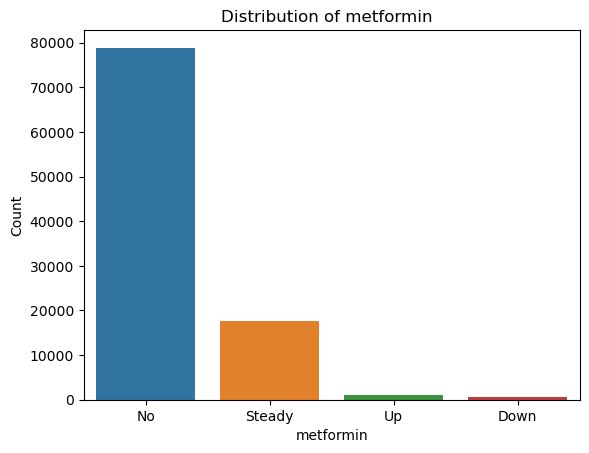

In [118]:
counter_plot("metformin")

readmitted       <30       >30        NO
metformin                               
Down        0.121377  0.336957  0.541667
No          0.116530  0.356728  0.526742
Steady      0.098078  0.340305  0.561617
Up          0.083415  0.332679  0.583906


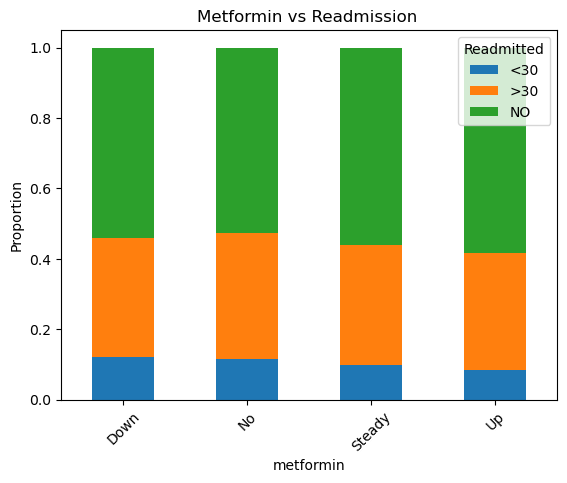

In [115]:
stacked_bar("metformin", "Metformin vs Readmission ")

repaglinide

In [119]:
chisquare_test_Cramers_value("repaglinide", diabetes_data)

Chi-square Statistic for repaglinide is 55.413103217426226
Degrees of Freedom for repaglinide is 6
p-value for repaglinide is 3.8252187354591566e-10
The Cramers Value for repaglinide is 0.01680356395582373


readmitted        <30       >30        NO
repaglinide                              
Down         0.066667  0.422222  0.511111
No           0.112555  0.352384  0.535061
Steady       0.132020  0.426696  0.441284
Up           0.186916  0.308411  0.504673


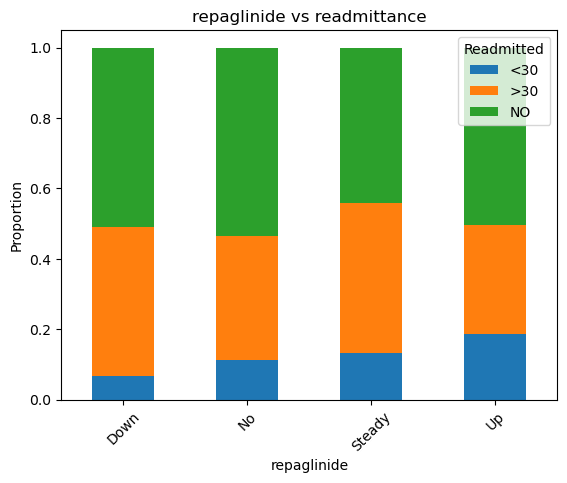

In [120]:
stacked_bar("repaglinide", "repaglinide vs readmittance")

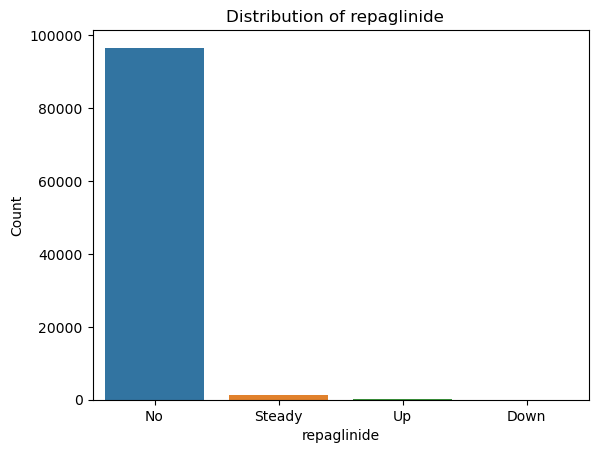

In [121]:
counter_plot("repaglinide")

In [122]:
diabetic_drugs = ["nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone",
"acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin",
"glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]

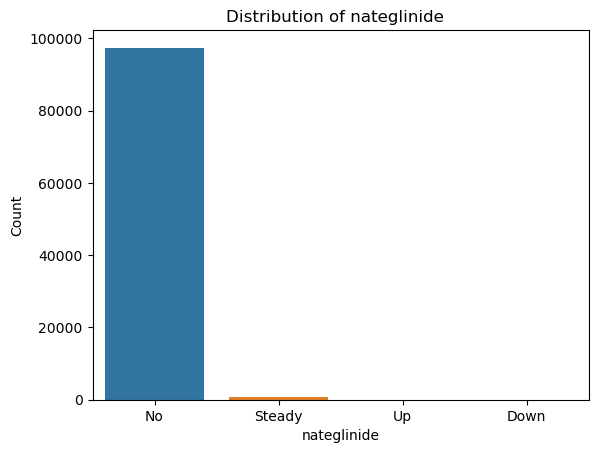

readmitted        <30       >30        NO
nateglinide                              
Down         0.090909  0.363636  0.545455
No           0.112866  0.353244  0.533890
Steady       0.118721  0.374429  0.506849
Up           0.043478  0.434783  0.521739


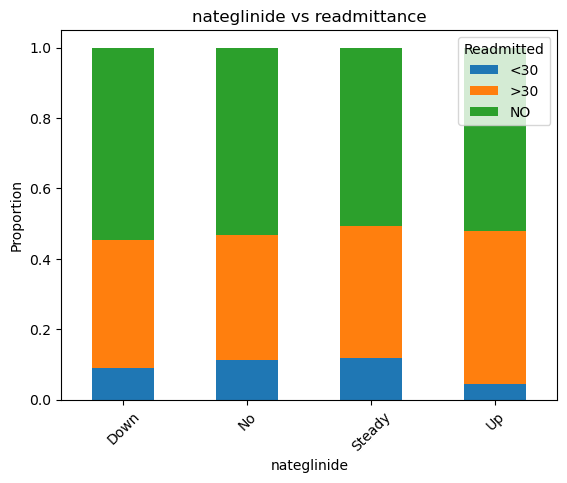

Chi-square Statistic for nateglinide is 3.393292790979161
Degrees of Freedom for nateglinide is 6
p-value for nateglinide is 0.7581082209216986
The Cramers Value for nateglinide is 0.004158204408525214


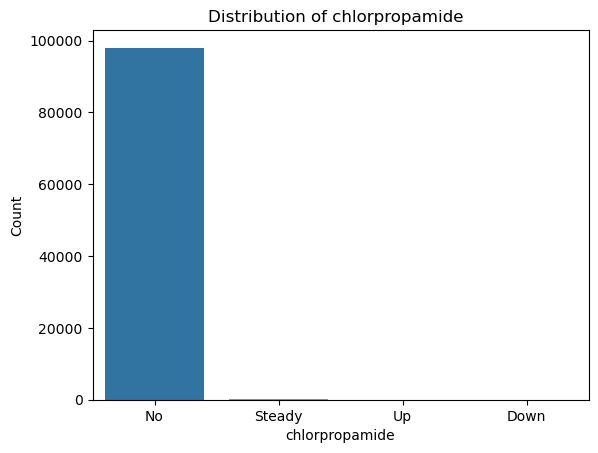

readmitted           <30       >30        NO
chlorpropamide                              
Down            0.000000  0.000000  1.000000
No              0.112931  0.353369  0.533700
Steady          0.065789  0.368421  0.565789
Up              0.000000  0.833333  0.166667


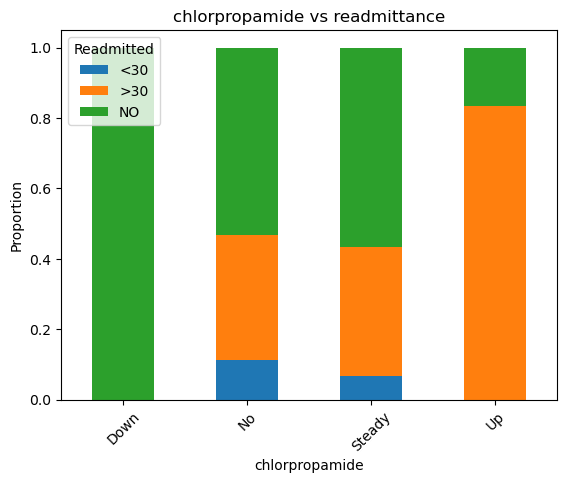

Chi-square Statistic for chlorpropamide is 8.666504048959379
Degrees of Freedom for chlorpropamide is 6
p-value for chlorpropamide is 0.19322046972052254
The Cramers Value for chlorpropamide is 0.006645338982006883


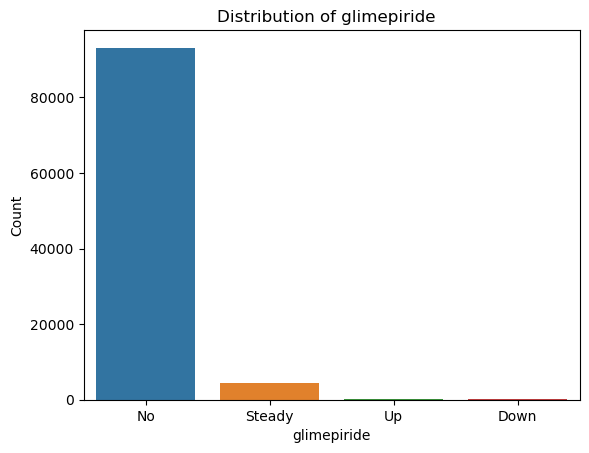

readmitted        <30       >30        NO
glimepiride                              
Down         0.130435  0.353261  0.516304
No           0.113460  0.352331  0.534209
Steady       0.100401  0.378005  0.521594
Up           0.111111  0.320635  0.568254


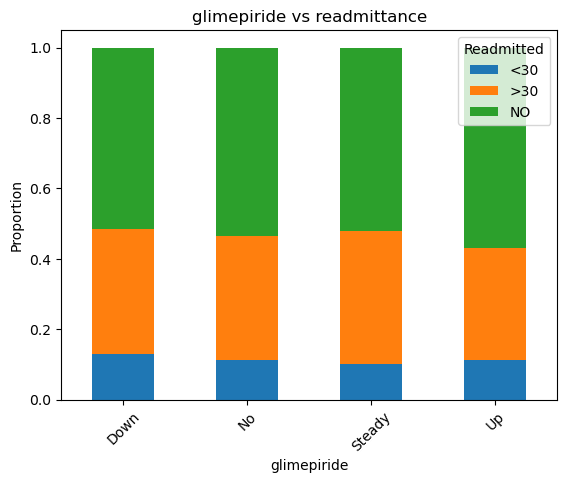

Chi-square Statistic for glimepiride is 18.026615639719953
Degrees of Freedom for glimepiride is 6
p-value for glimepiride is 0.006166024420776673
The Cramers Value for glimepiride is 0.009584120529137994


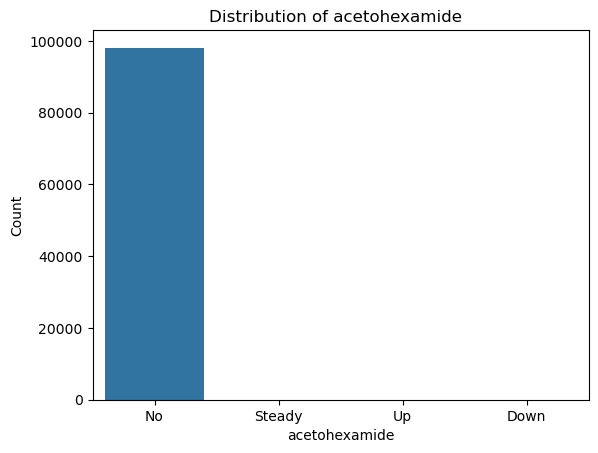

readmitted          <30     >30        NO
acetohexamide                            
No             0.112888  0.3534  0.533712
Steady         0.000000  1.0000  0.000000


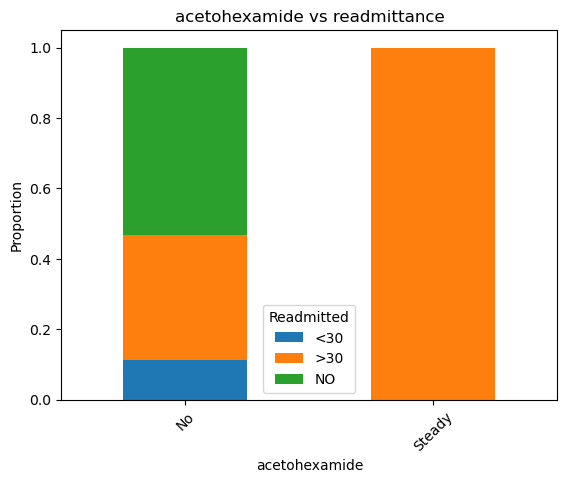

Chi-square Statistic for acetohexamide is 1.829622429212185
Degrees of Freedom for acetohexamide is 2
p-value for acetohexamide is 0.4005922449174822
The Cramers Value for acetohexamide is 0.004318082175399164


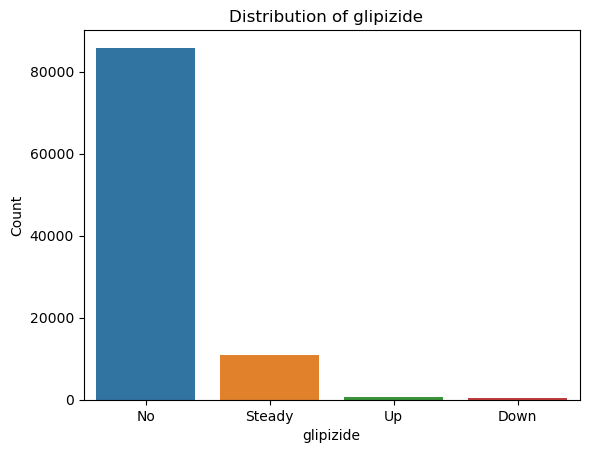

readmitted       <30       >30        NO
glipizide                               
Down        0.155268  0.378928  0.465804
No          0.112448  0.350218  0.537333
Steady      0.112940  0.375921  0.511139
Up          0.131649  0.369681  0.498670


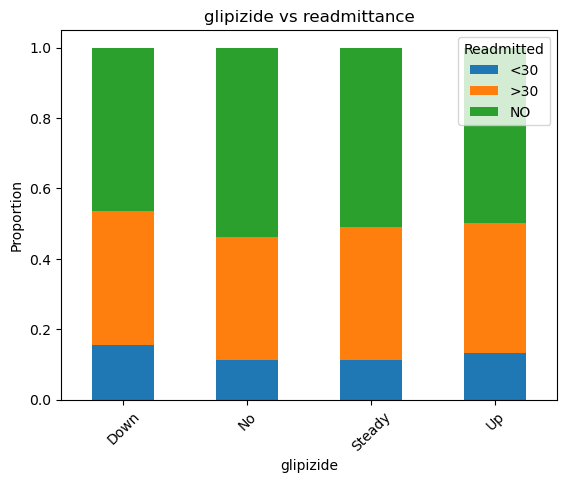

Chi-square Statistic for glipizide is 49.91397185370357
Degrees of Freedom for glipizide is 6
p-value for glipizide is 4.891492086560251e-09
The Cramers Value for glipizide is 0.01594800019069996


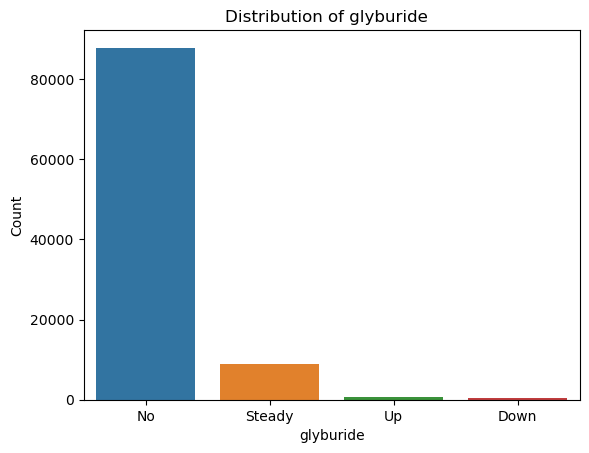

readmitted       <30       >30        NO
glyburide                               
Down        0.094620  0.398887  0.506494
No          0.113523  0.353396  0.533081
Steady      0.108226  0.351763  0.540011
Up          0.107323  0.342172  0.550505


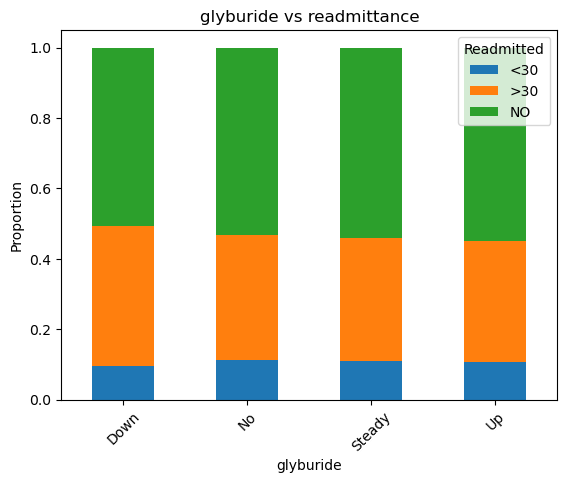

Chi-square Statistic for glyburide is 9.246937114053257
Degrees of Freedom for glyburide is 6
p-value for glyburide is 0.1601593602538638
The Cramers Value for glyburide is 0.006864266231698362


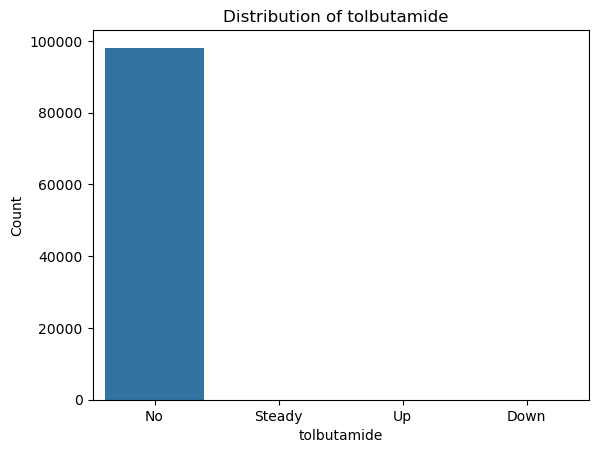

readmitted        <30       >30        NO
tolbutamide                              
No           0.112902  0.353424  0.533674
Steady       0.045455  0.272727  0.681818


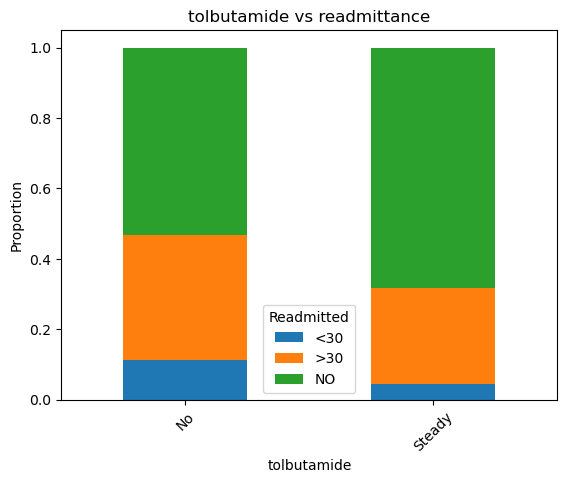

Chi-square Statistic for tolbutamide is 2.1961199861762686
Degrees of Freedom for tolbutamide is 2
p-value for tolbutamide is 0.3335174827077537
The Cramers Value for tolbutamide is 0.00473083931490517


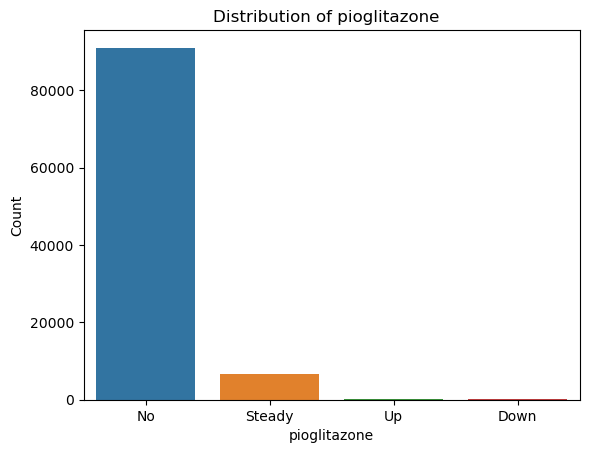

readmitted         <30       >30        NO
pioglitazone                              
Down          0.147826  0.382609  0.469565
No            0.113428  0.351205  0.535367
Steady        0.104672  0.380988  0.514341
Up            0.122807  0.399123  0.478070


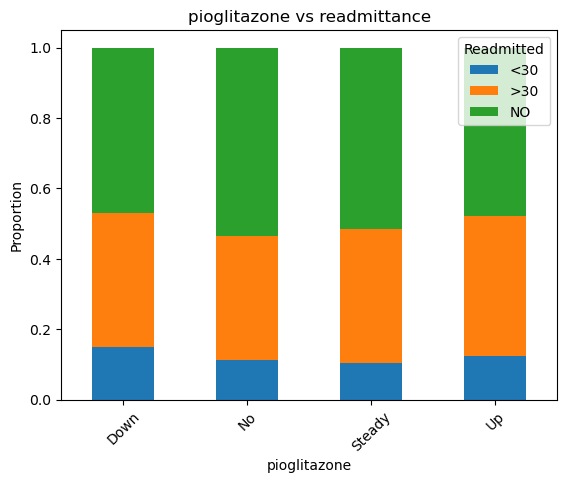

Chi-square Statistic for pioglitazone is 30.587689171986096
Degrees of Freedom for pioglitazone is 6
p-value for pioglitazone is 3.038208580593386e-05
The Cramers Value for pioglitazone is 0.012484423757032284


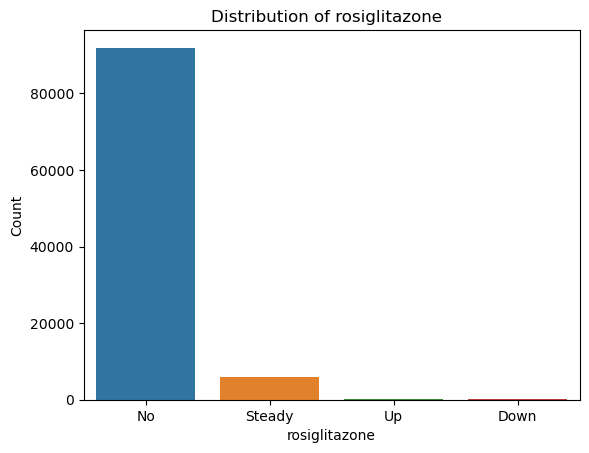

readmitted          <30       >30        NO
rosiglitazone                              
Down           0.059524  0.261905  0.678571
No             0.113425  0.351389  0.535186
Steady         0.105548  0.387686  0.506766
Up             0.103448  0.298851  0.597701


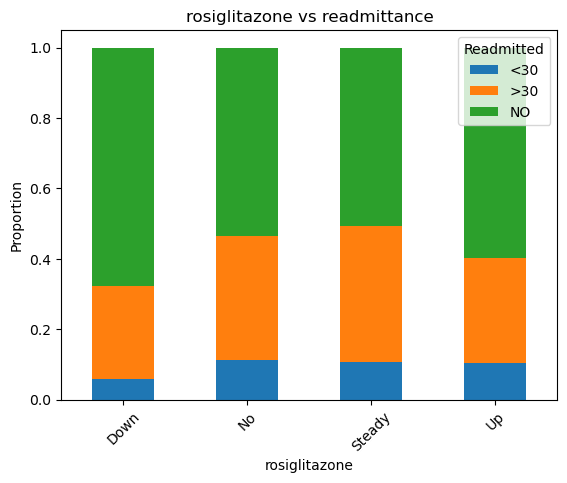

Chi-square Statistic for rosiglitazone is 42.53958386106762
Degrees of Freedom for rosiglitazone is 6
p-value for rosiglitazone is 1.4385463784002922e-07
The Cramers Value for rosiglitazone is 0.014722846557545605


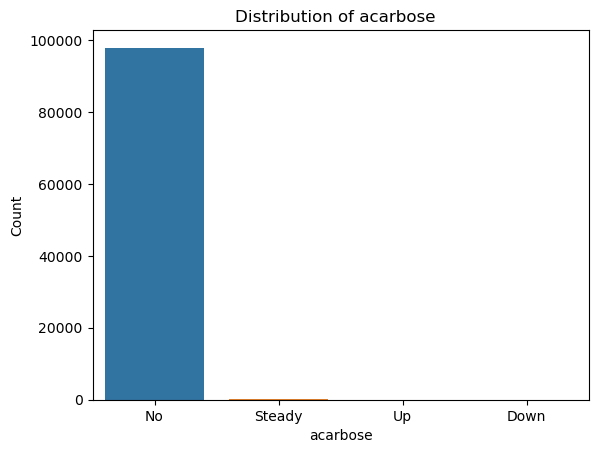

readmitted       <30       >30        NO
acarbose                                
Down        0.333333  0.333333  0.333333
No          0.112956  0.352933  0.534112
Steady      0.083916  0.513986  0.402098
Up          0.200000  0.400000  0.400000


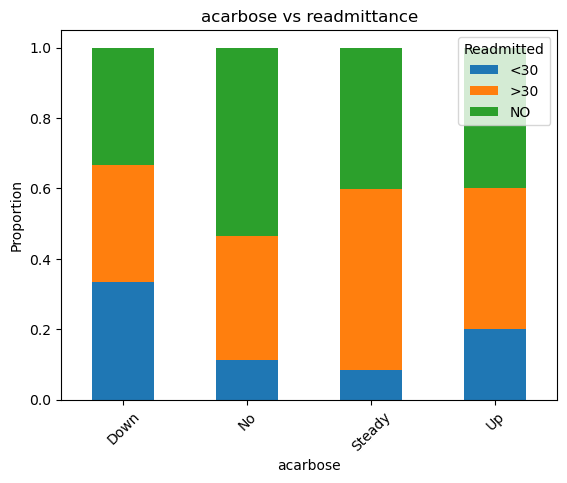

Chi-square Statistic for acarbose is 34.96127131066186
Degrees of Freedom for acarbose is 6
p-value for acarbose is 4.384599712920723e-06
The Cramers Value for acarbose is 0.013347157203114317


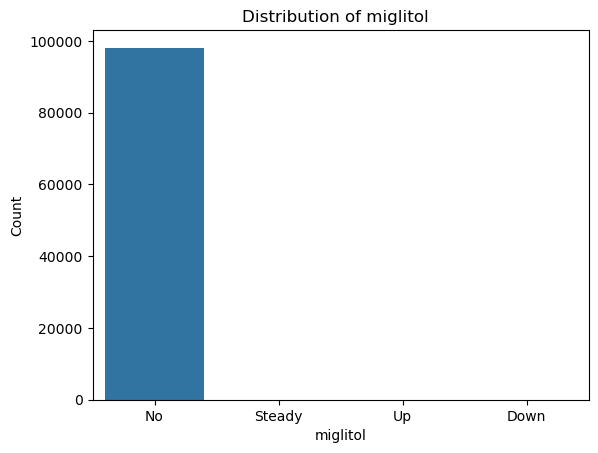

readmitted       <30       >30        NO
miglitol                                
Down        0.400000  0.600000  0.000000
No          0.112890  0.353339  0.533771
Steady      0.064516  0.516129  0.419355
Up          0.000000  0.500000  0.500000


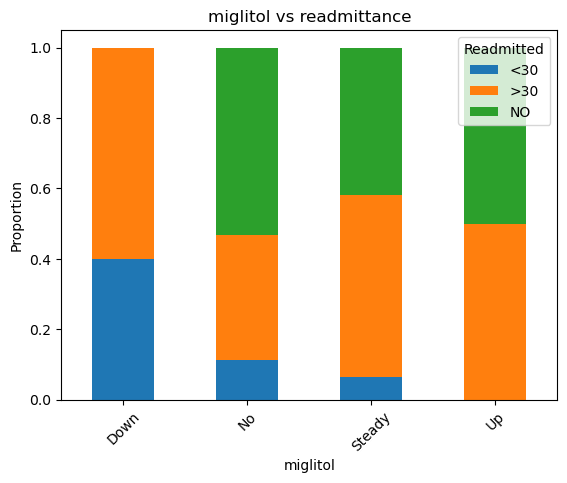

Chi-square Statistic for miglitol is 11.258388505593558
Degrees of Freedom for miglitol is 6
p-value for miglitol is 0.08071144851996992
The Cramers Value for miglitol is 0.0075741392079811945


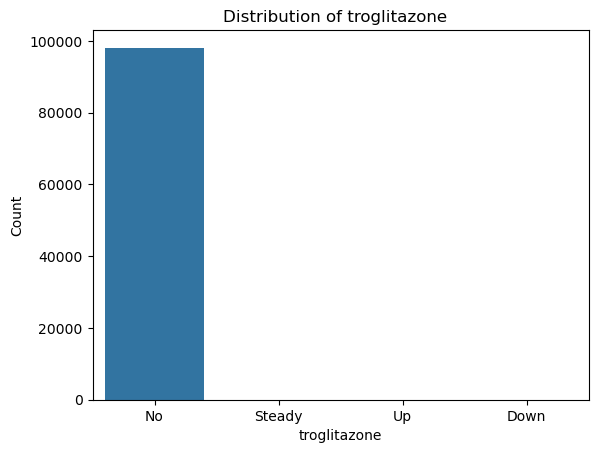

readmitted        <30       >30        NO
troglitazone                             
No            0.11289  0.353397  0.533713
Steady        0.00000  0.666667  0.333333


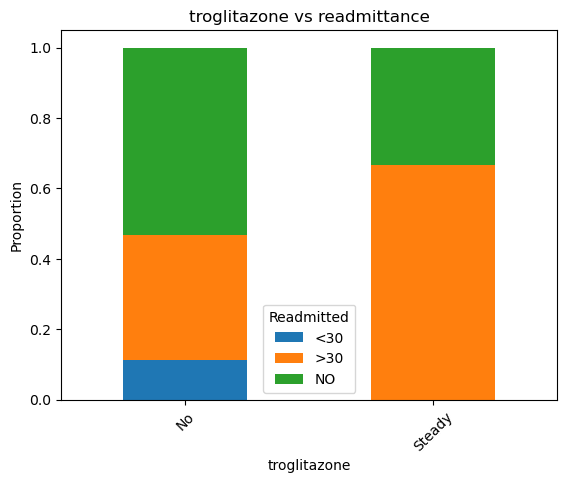

Chi-square Statistic for troglitazone is 1.397410176376727
Degrees of Freedom for troglitazone is 2
p-value for troglitazone is 0.4972287544828129
The Cramers Value for troglitazone is 0.003773741222789145


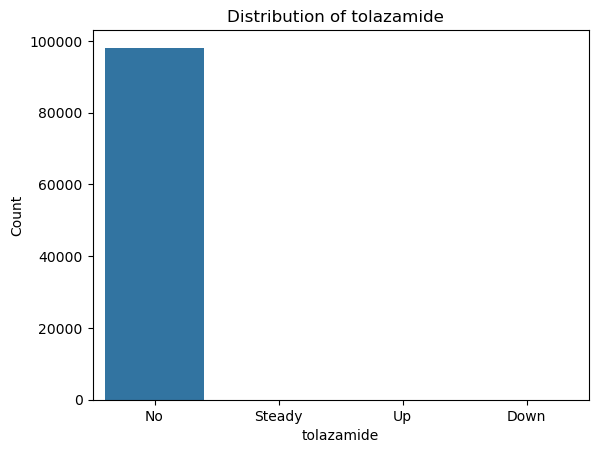

readmitted       <30       >30        NO
tolazamide                              
No          0.112899  0.353438  0.533664
Steady      0.083333  0.250000  0.666667
Up          0.000000  1.000000  0.000000


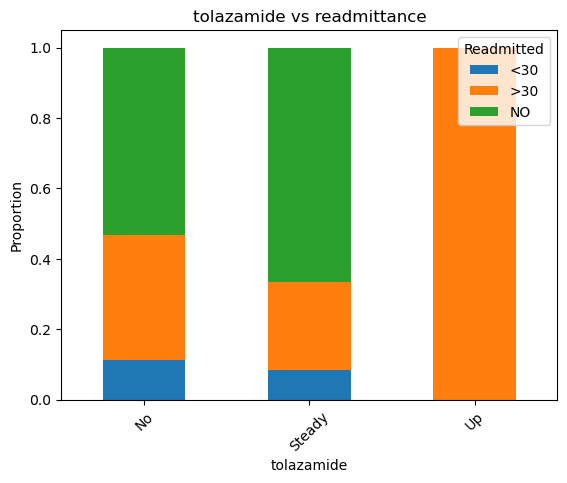

Chi-square Statistic for tolazamide is 4.390562779380227
Degrees of Freedom for tolazamide is 4
p-value for tolazamide is 0.35572182861981083
The Cramers Value for tolazamide is 0.004729935984474218


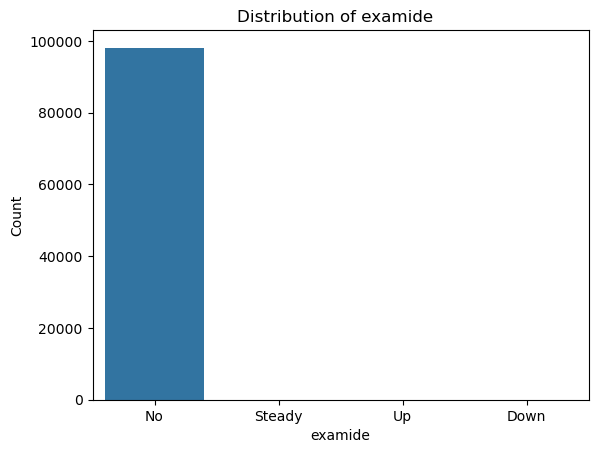

readmitted       <30       >30        NO
examide                                 
No          0.112887  0.353406  0.533707


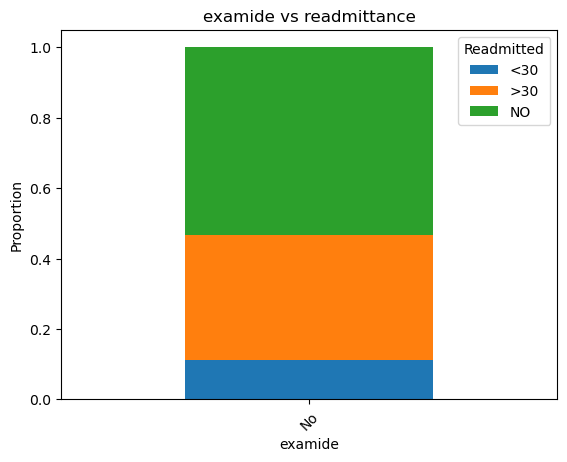

Chi-square Statistic for examide is 0.0
Degrees of Freedom for examide is 0
p-value for examide is 1.0
The Cramers Value for examide is nan


/var/folders/p4/3cqzf41n6qd9wztj0kpx71_m0000gn/T/ipykernel_51922/3462209632.py:14: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * minumum_dimension))


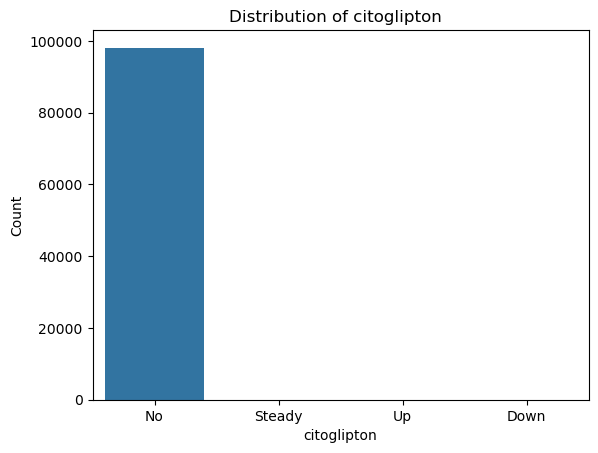

readmitted        <30       >30        NO
citoglipton                              
No           0.112887  0.353406  0.533707


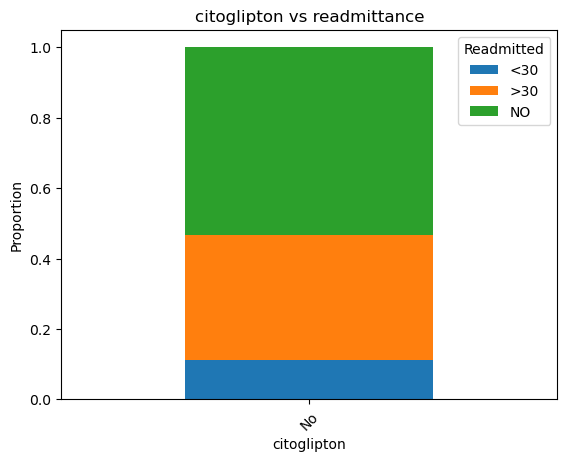

Chi-square Statistic for citoglipton is 0.0
Degrees of Freedom for citoglipton is 0
p-value for citoglipton is 1.0
The Cramers Value for citoglipton is nan


/var/folders/p4/3cqzf41n6qd9wztj0kpx71_m0000gn/T/ipykernel_51922/3462209632.py:14: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * minumum_dimension))


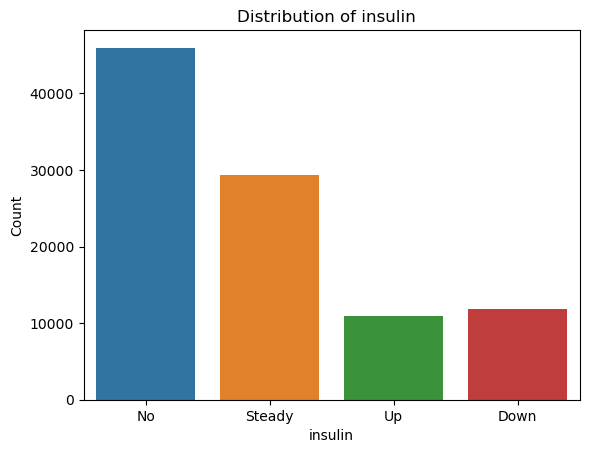

readmitted       <30       >30        NO
insulin                                 
Down        0.140229  0.391326  0.468444
No          0.101353  0.340467  0.558180
Steady      0.112930  0.345730  0.541341
Up          0.131683  0.387437  0.480880


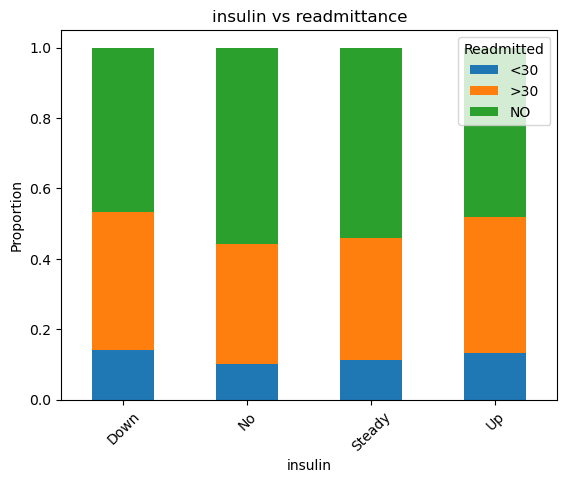

Chi-square Statistic for insulin is 483.85536118835444
Degrees of Freedom for insulin is 6
p-value for insulin is 2.5239146767529794e-101
The Cramers Value for insulin is 0.04965385206772571


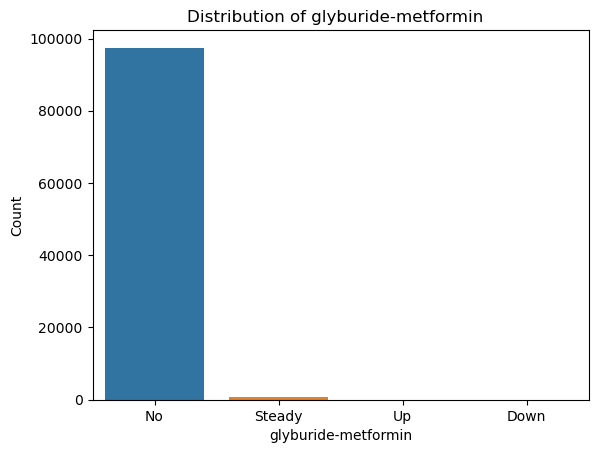

readmitted                <30       >30        NO
glyburide-metformin                              
Down                 0.000000  0.000000  1.000000
No                   0.112935  0.353233  0.533831
Steady               0.107251  0.382175  0.510574
Up                   0.000000  0.166667  0.833333


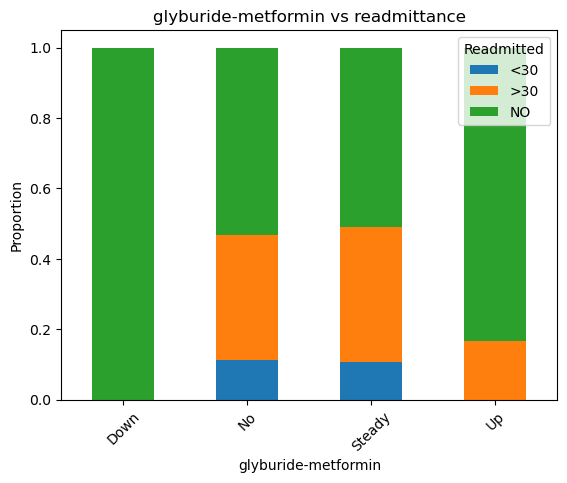

Chi-square Statistic for glyburide-metformin is 7.31320723168846
Degrees of Freedom for glyburide-metformin is 6
p-value for glyburide-metformin is 0.2928505549356915
The Cramers Value for glyburide-metformin is 0.006104486073795576


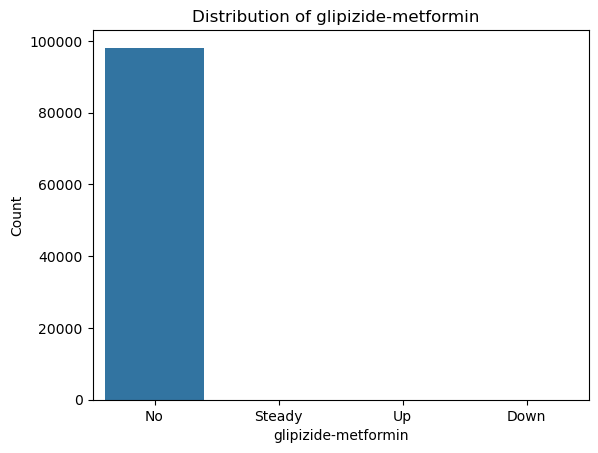

readmitted                <30       >30        NO
glipizide-metformin                              
No                   0.112891  0.353382  0.533727
Steady               0.076923  0.538462  0.384615


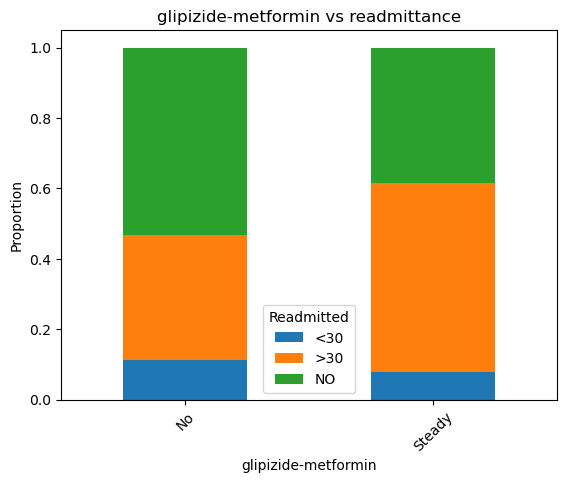

Chi-square Statistic for glipizide-metformin is 1.950351579049135
Degrees of Freedom for glipizide-metformin is 2
p-value for glipizide-metformin is 0.37712605292630297
The Cramers Value for glipizide-metformin is 0.004458272584327873


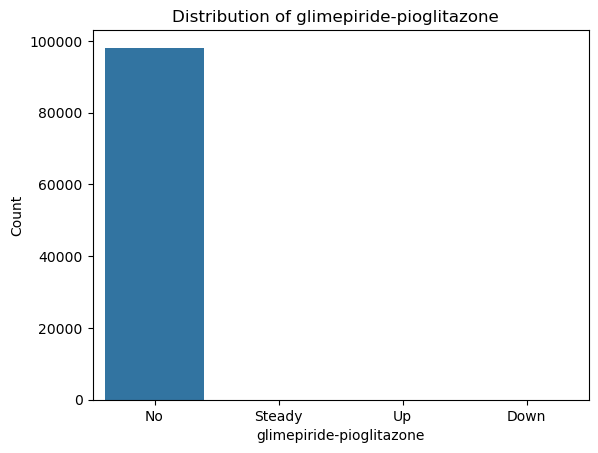

readmitted                     <30     >30        NO
glimepiride-pioglitazone                            
No                        0.112888  0.3534  0.533712
Steady                    0.000000  1.0000  0.000000


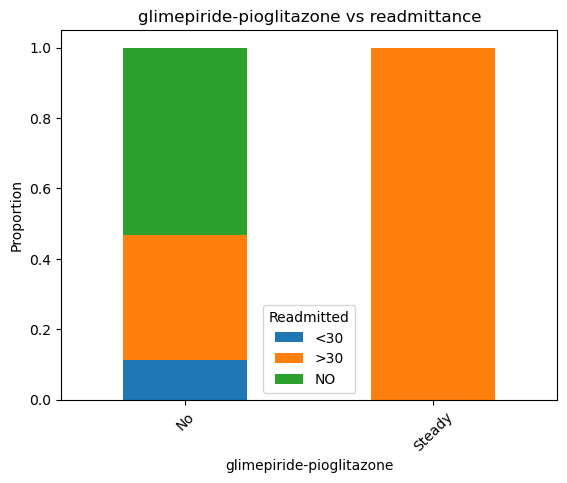

Chi-square Statistic for glimepiride-pioglitazone is 1.829622429212185
Degrees of Freedom for glimepiride-pioglitazone is 2
p-value for glimepiride-pioglitazone is 0.4005922449174822
The Cramers Value for glimepiride-pioglitazone is 0.004318082175399164


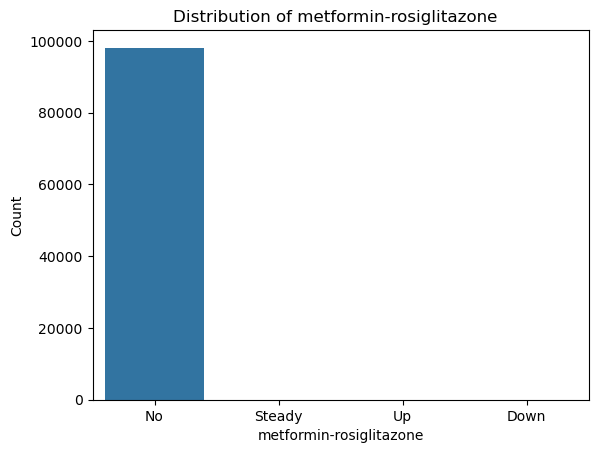

readmitted                    <30       >30        NO
metformin-rosiglitazone                              
No                       0.112887  0.353406  0.533707


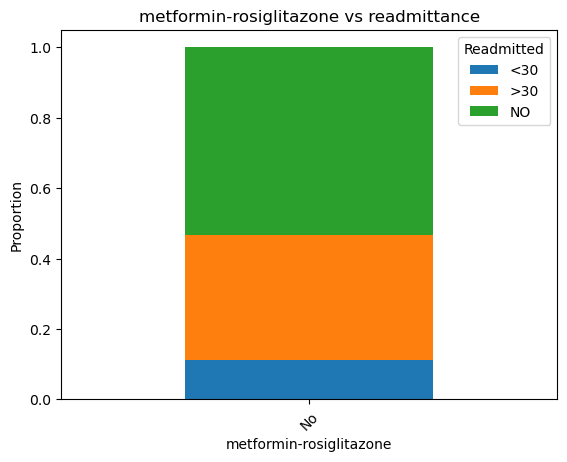

Chi-square Statistic for metformin-rosiglitazone is 0.0
Degrees of Freedom for metformin-rosiglitazone is 0
p-value for metformin-rosiglitazone is 1.0
The Cramers Value for metformin-rosiglitazone is nan


/var/folders/p4/3cqzf41n6qd9wztj0kpx71_m0000gn/T/ipykernel_51922/3462209632.py:14: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * minumum_dimension))


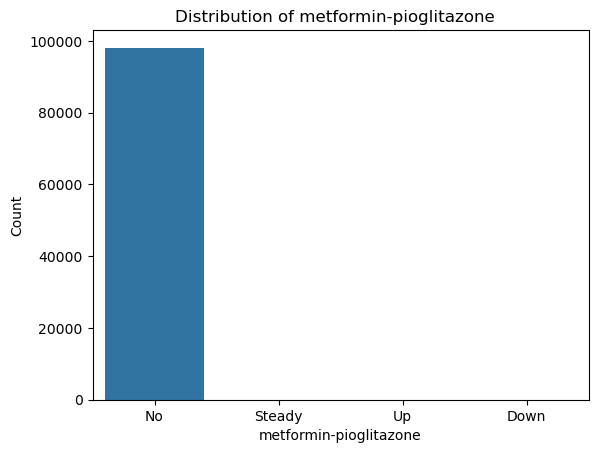

readmitted                   <30      >30        NO
metformin-pioglitazone                             
No                      0.112888  0.35341  0.533702
Steady                  0.000000  0.00000  1.000000


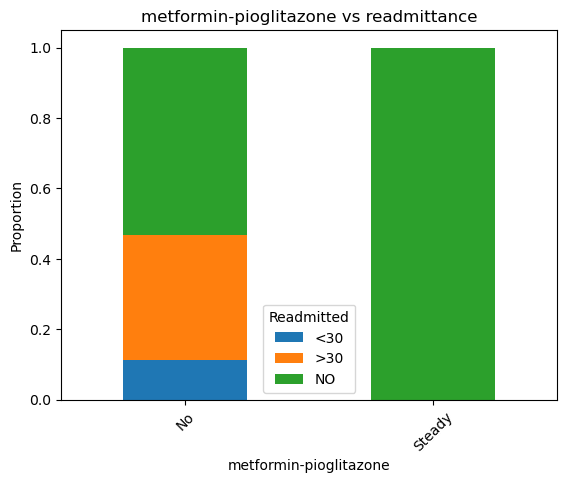

Chi-square Statistic for metformin-pioglitazone is 0.8736961294203875
Degrees of Freedom for metformin-pioglitazone is 2
p-value for metformin-pioglitazone is 0.6460695847235496
The Cramers Value for metformin-pioglitazone is 0.002983941956404089


In [128]:
for drug in diabetic_drugs:
    counter_plot(drug)
    stacked_bar(drug, f"{drug} vs readmittance")
    chisquare_test_Cramers_value(drug, diabetes_data)
    